In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 1. 선형 회귀 알고리즘을 사용하여 주어진 데이터셋을 학습해봅시다.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 (설치 이후 런타임 세 다시 시작 후, 다시 설치하면 됩니다!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive

from sklearn.model_selection import train_test_split
# 평균제곱오차, 평균절대오차 함수를 불러옵니다
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression


drive.mount('/content/drive')

#데이터 불러오기
salary_data = pd.read_csv('/content/drive/MyDrive/salary_data.csv')

# 데이터 구조 확인
salary_data.info(), salary_data.head()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

(None,
    Years of Experience    Salary
 0                  3.0   52000.0
 1                  3.0   70000.0
 2                  4.0   55000.0
 3                 10.0  110000.0
 4                  8.0  140000.0)

In [3]:
# 입력(X)과 출력(y) 설정
X = salary_data[['Years of Experience']]
y = salary_data['Salary']

# 학습용과 테스트용 데이터 분할 (테스트 40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)
# 평균절대오차(MAE)를 계산합니다
mae = mean_absolute_error(y_test, y_pred)

print("평균제곱오차 (MSE):", np.round(mse, 3))
print("평균절대오차 (MAE):", np.round(mae, 3))



평균제곱오차 (MSE): 977417275.833
평균절대오차 (MAE): 25124.961


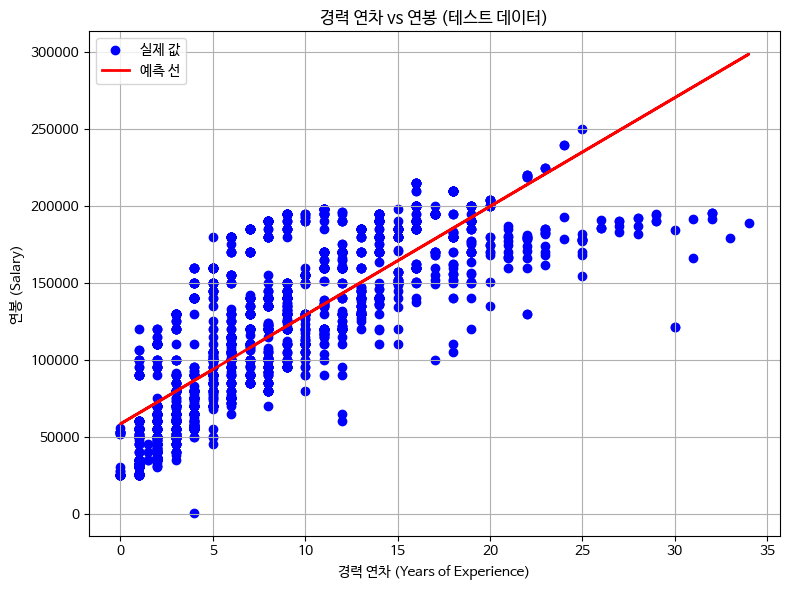

In [4]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='실제 값')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='예측 선')
plt.title('경력 연차 vs 연봉 (테스트 데이터)')
plt.xlabel('경력 연차 (Years of Experience)')
plt.ylabel('연봉 (Salary)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 로지스틱 회귀 알고리즘을 사용하여 주어진 데이터셋을 학습해봅시다.

In [5]:

#데이터 불러오기
heart_data = pd.read_csv('/content/drive/MyDrive/heart_data.csv')

# 데이터 구조 확인
heart_data.info(), heart_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   trestbps  1000 non-null   int64  
 2   chol      1000 non-null   int64  
 3   thalach   1000 non-null   int64  
 4   oldpeak   1000 non-null   float64
 5   target    1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


(None,
    age  trestbps  chol  thalach  oldpeak  target
 0   56       130   221      163      0.0       1
 1   66       146   278      152      0.0       1
 2   66       150   226      114      2.6       1
 3   63       130   330      132      1.8       0
 4   48       130   275      139      0.2       1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 입력(X)과 출력(y) 설정
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# 학습용과 테스트용 데이터 분할 (테스트 40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = log_model.predict(X_test)

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#accuracy, precision, recall, f1

print("정확도:", np.round(accuracy, 3))
print("정밀도:", np.round(precision, 3))
print("재현율:", np.round(recall, 3))
print("F1 점수:", np.round(f1, 3))


정확도: 0.7
정밀도: 0.693
재현율: 0.754
F1 점수: 0.722


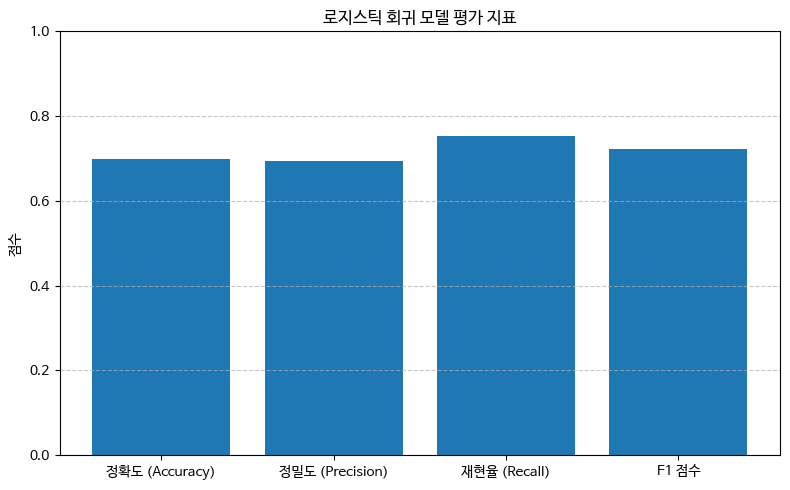

In [7]:
metrics = {
    '정확도 (Accuracy)': accuracy,
    '정밀도 (Precision)': precision,
    '재현율 (Recall)': recall,
    'F1 점수': f1
}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.title('로지스틱 회귀 모델 평가 지표')
plt.ylabel('점수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. 서포트 벡터 머신 알고리즘을 사용하여 주어진 데이터셋을 학습해봅시다.

In [8]:
#데이터 불러오기
income_data = pd.read_csv('/content/drive/MyDrive/income_data.csv')

# 데이터 구조 확인
income_data.info(), income_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              10000 non-null  int64
 1   fnlwgt           10000 non-null  int64
 2   capital-gain     10000 non-null  int64
 3   educational-num  10000 non-null  int64
 4   hours-per-week   10000 non-null  int64
 5   target           10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


(None,
    age  fnlwgt  capital-gain  educational-num  hours-per-week  target
 0   26  211435             0                9              40       0
 1   25  201635             0               13              50       0
 2   65  178771             0                9              40       0
 3   29  206351          5013                6              40       0
 4   43  212490             0               11              40       0)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 입력(X)과 출력(y) 설정
X = income_data.drop('target', axis=1)
y = income_data['target']

# 학습용과 테스트용 데이터 분할 (테스트 40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# SVM 모델 생성 및 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = svm_model.predict(X_test)

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#accuracy, precision, recall, f1
print("정확도:", np.round(accuracy, 3))
print("정밀도:", np.round(precision, 3))
print("재현율:", np.round(recall, 3))
print("F1 점수:", np.round(f1, 3))



정확도: 0.769
정밀도: 1.0
재현율: 0.079
F1 점수: 0.146


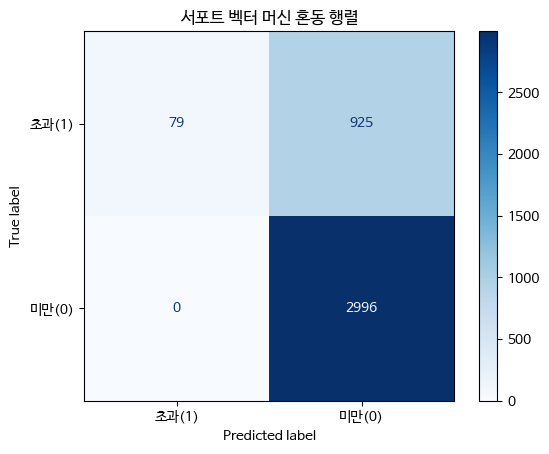

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["초과(1)", "미만(0)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("서포트 벡터 머신 혼동 행렬")
plt.show()